# Part I - Personal Key Indicators of Heart Disease
## by Huzaifa Shehu Imam

## Introduction
The dataset was obtained from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (Negroes, American Indians and Alaska Natives, and Caucasians). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicators include diabetic status, obesity (high BMI), sedentary lifestyle or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. The original dataset contained 401,958 rows and 279 columns, the cleaned dataset posted on Kaggle however contains only 20 columns/variables of different types, which are of relevance to heart disease


### Step 1: Importing the required packages/libraries 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import missingno as mno
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

### Step 2: Loading the dataset 

In [2]:
heart_disease_df = pd.read_csv("C:/Users/HP/Downloads/heart-disease/heart_2020_cleaned.csv")

In [3]:
heart_disease_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Step 3: Exploring the dataset 

In [4]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# let's check out the number of unique values in each column
heart_disease_df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [6]:
# I will now have a closer look at the unique variables under each column using a function
for col in heart_disease_df.columns:
    print(col, '\n', heart_disease_df[col].unique(), '\n')

HeartDisease 
 ['No' 'Yes'] 

BMI 
 [16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking 
 ['Yes' 'No'] 

AlcoholDrinking 
 ['No' 'Yes'] 

Stroke 
 ['No' 'Yes'] 

PhysicalHealth 
 [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth 
 [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking 
 ['No' 'Yes'] 

Sex 
 ['Female' 'Male'] 

AgeCategory 
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race 
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic 
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity 
 ['Yes' 'No'] 

GenHealth 
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime 
 [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22

In [7]:
heart_disease_df.shape

(319795, 18)

In [8]:
heart_disease_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


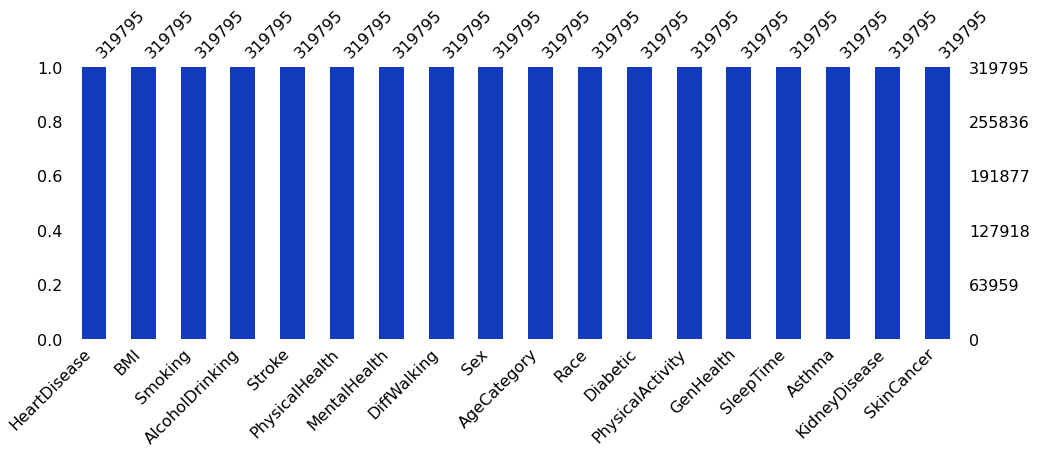

In [9]:
#let's take a look at the data graphically, to confirm if there are any 
#discrepancies in terms of the number of variables in each column of our dataset

mno.bar(heart_disease_df, figsize = (16,5),color = "#123abc")
plt.show()

### What is the structure of your dataset?

The dataset has information on 319,795 survey responders on 18 criteria. Out of these 18 columns, Four contain numerical variables (BMI, PhysicalHealth, MentalHealth, SleepTime), while the rest of the columns contain categorical data. 

***Columns and meanings***
1 HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
2 BMI: Body mass index
3 Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]
4 AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.
5 Stroke: (Ever told) (you had) a stroke?
6 PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
7 MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
8 DiffWalking: Do you have serious difficulty walking or climbing stairs?
9 Sex: IS the respondent male or female?
10 AgeCategory: Which age category does the patient belong to?
11 Race: Race/ethnicity value
12 Diabetic: Is the patient diabetic? Has he/she ever been told he had high blood sugar?
13 PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
14 GenHealth: What is the responders personal assessment of their own health status based on a likert scale
15 SLeepTime:On average, how many hours of sleep do you get in a 24-hour period?
16 Asthma: (Ever told) (you had) asthma?
17 KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
18 SkinCancer: Has the patient ever been told they had skin cancer?

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the columns that contain information on the key predictors for heart disease (high blood pressure, high cholesterol, and smoking), and the column that indicates if a subject has or does not have the outcome of interest, i.e heart disease

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

### Univariate Exploration of categorical variables

#### What does the distribution of heart disease in the population looks like?

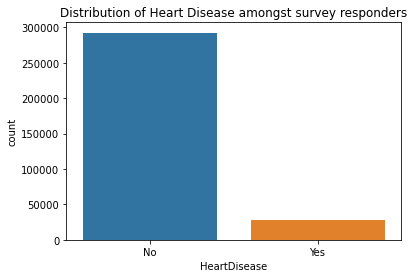

In [46]:
#First off, we will begin by looking at the distribution of heart disease in our research population
sb.countplot(data=heart_disease_df, x='HeartDisease')
plt.title('Distribution of Heart Disease amongst survey responders');

#### What is the distribution of heart disease between Males and Females?

Our bar chart reveals that an overwhelming majority of respondents do not have the outcome of interest

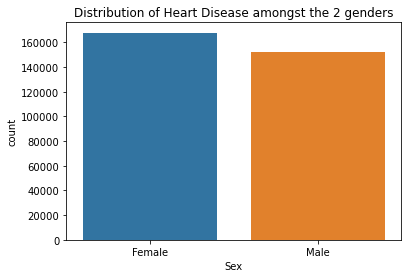

In [47]:
# We will start off by looking at the the gender column of the dataset, to find out how many males and females there are
# amongst the respondents, we can answer this question using a countplot.

sb.countplot(data=heart_disease_df, x='Sex')
plt.title('Distribution of Heart Disease amongst the 2 genders');

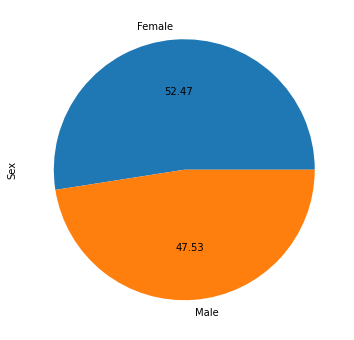

In [12]:
male_vs_female = heart_disease_df['Sex'].value_counts()
male_vs_female.plot(kind='pie', autopct='%.2f', figsize=(6, 6));

Our bar chart reveals that there are more female reponders in the survey compared to male. The pie chart went a step further by showing us that close to 53% of all respondents are female

#### How prevalent is stroke among respondents?

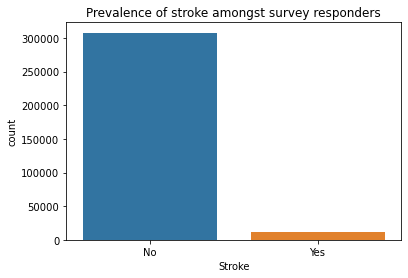

In [48]:
#Another important thing to look at is the number of people whom have had a stroke and those who have not had a stroke,
# we will investigate this using a countplot also

sb.countplot(data=heart_disease_df, x='Stroke')
plt.title('Prevalence of stroke amongst survey responders');

The bar chart reveals that stroke is not prevalent amongst the survey respondents

#### How prevalent is alcoholism amongst respondents? 

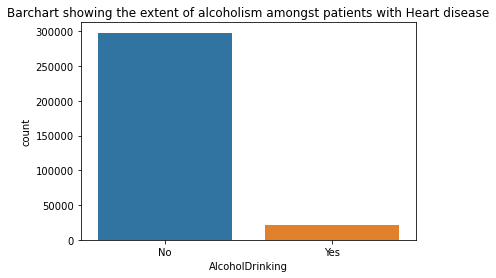

In [50]:
#An important predictor for heart disease is alcoholism, let's take a look at our dataset and visualise 
#how many respondents are alcoholic

sb.countplot(data=heart_disease_df, x='AlcoholDrinking')
plt.title('Barchart showing the extent of alcoholism amongst patients with Heart disease');

An overwhelming majority of repondents report that they are not alcoholic

#### How prevalent is smoking among reponders?

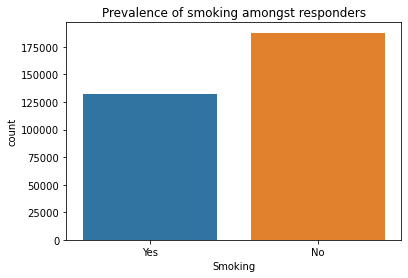

In [51]:
#Another important predictor for heart disease is smoking, lets take a look at our dataset and see the proportion of patients that smoke
sb.countplot(data=heart_disease_df, x='Smoking')
plt.title('Prevalence of smoking amongst responders');

We can see that although many of the subjects smoke, a majority of reponders report that they do not smoke

In [16]:
# Looking at the BMI column in its current format, we are not able to discern much from it. I will create a new column called 
# 'BMI_categories', and within this column, we will have 6 categories of weight classes 
#(underweight, healthy weight, overweight, Obese class 1, obese class 2 and obese class 3).

def get_category(BMI):
    if not BMI:
        return None
    if BMI < 18.5:
        return "Under Weight"
    if BMI < 25:
        return "Healthy Weight"
    if BMI < 30:
        return "Overweight"
    if BMI < 35:
        return "Obese class I"
    if BMI < 40:
        return "Obese class II"
    return "Obese class III"

heart_disease_df['BMI_Category'] = heart_disease_df['BMI'].apply(get_category)

In [17]:
#Let's take a peek at a sample from the dataframe to confirm if our new column has been created correctly
heart_disease_df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_Category
160244,No,19.37,Yes,No,No,0.0,0.0,No,Male,40-44,Black,No,Yes,Excellent,7.0,Yes,No,No,Healthy Weight
92016,No,46.59,No,No,No,0.0,0.0,Yes,Female,70-74,White,Yes,Yes,Good,7.0,No,No,No,Obese class III
218205,No,29.76,Yes,No,No,0.0,0.0,No,Male,75-79,White,Yes,Yes,Good,10.0,No,No,No,Overweight
136265,Yes,37.31,Yes,No,No,20.0,30.0,Yes,Male,45-49,White,No,Yes,Poor,8.0,Yes,No,No,Obese class II
307293,No,21.35,No,No,No,2.0,0.0,No,Female,70-74,White,No,Yes,Very good,6.0,No,No,No,Healthy Weight


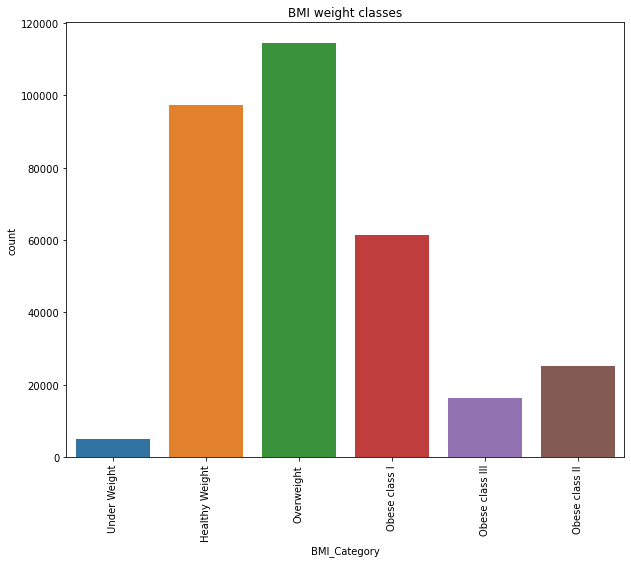

In [52]:
#I wonder, how many of our respondents are overweight? how many are underweight or Obese? let's answer this question 
#with a countplot

plt.figure(figsize = (10,8))
ax = sb.countplot(data=heart_disease_df, x='BMI_Category')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, size = 10)
plt.title('BMI weight classes');

Our countplot shows that most of the respondents are either within the healthy weight range or overweight. The plot also reveals that an overwhelming majority of the survey responders are within the at-risk weight groups.

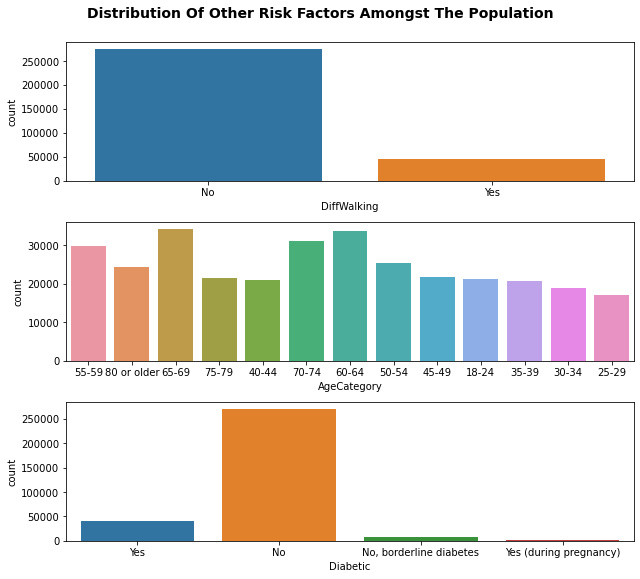

In [89]:
fig, ax = plt.subplots(nrows=3, figsize = [9,8])
sb.countplot(heart_disease_df['DiffWalking'], ax=ax[0])
sb.countplot(heart_disease_df['AgeCategory'], ax=ax[1])
sb.countplot(heart_disease_df['Diabetic'], ax=ax[2])
plt.suptitle('Distribution of other risk factors amongst the population'.title(), y =1, fontsize = 14, weight ="bold")
plt.tight_layout();


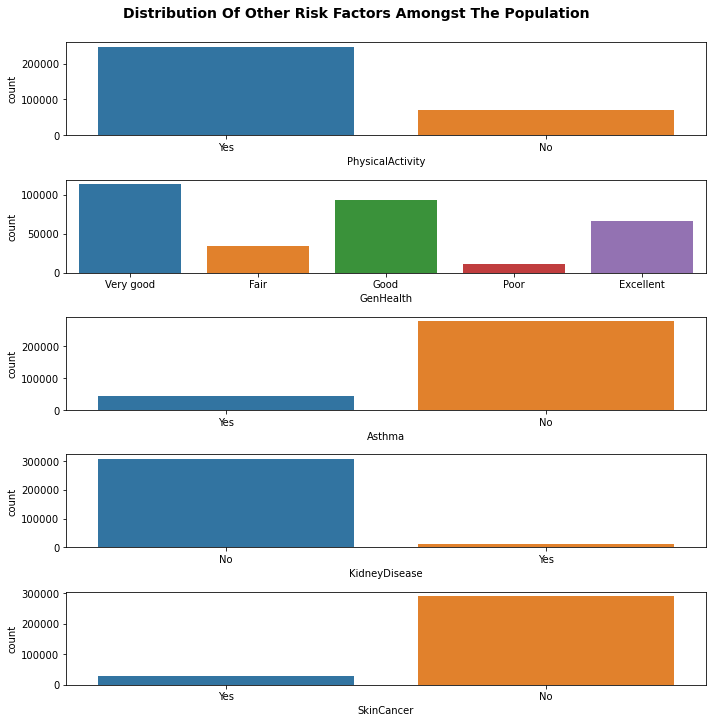

In [90]:
fig, ax = plt.subplots(nrows=5, figsize = [10,10])
sb.countplot(heart_disease_df['PhysicalActivity'], ax=ax[0])
sb.countplot(heart_disease_df['GenHealth'], ax=ax[1])
sb.countplot(heart_disease_df['Asthma'], ax=ax[2])
sb.countplot(heart_disease_df['KidneyDisease'], ax=ax[3])
sb.countplot(heart_disease_df['SkinCancer'], ax=ax[4])
plt.suptitle('Distribution of other risk factors amongst the population'.title(), y =1, fontsize = 14, weight ="bold")
plt.tight_layout();

On looking at the distribution of the other categorical variables in the dataset, we can observe that most people do not have kidney disease or skin cancer, they do not experience difficulty in ambulation, are generally of good health, do not have diabetes and report to be physically active.

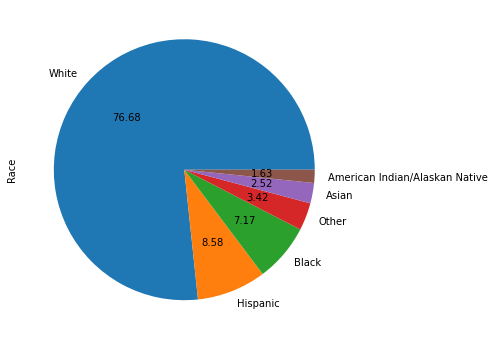

In [21]:
#Another important aspect we need to consider is the racial profile of the respondents.
racial_distribution = heart_disease_df['Race'].value_counts()
racial_distribution.plot(kind='pie', autopct='%.2f', figsize=(6, 6));

Our pie chart reveals that an overwhelming majority of the study population are caucasians, while the list represented pouplation are Native Americans and Alaskan natives.

### Univariate exploration of Numerical variables

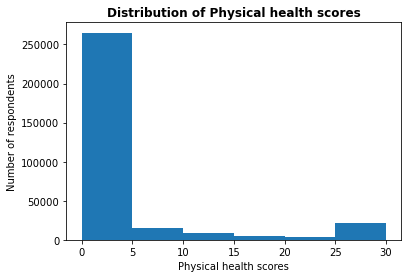

In [91]:
bins = np.arange(0, heart_disease_df['PhysicalHealth'].max()+5, 5)
plt.hist(data = heart_disease_df, x = 'PhysicalHealth', bins = bins)
plt.title('Distribution of Physical health scores', y =1, weight = "bold")
plt.xlabel('Physical health scores')
plt.ylabel('Number of respondents');

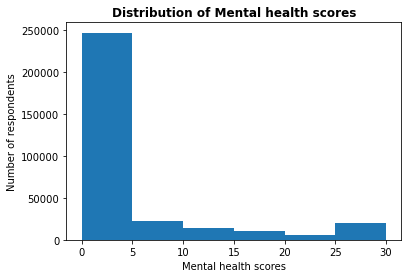

In [92]:
bins = np.arange(0, heart_disease_df['MentalHealth'].max()+5, 5)
plt.hist(data = heart_disease_df, x = 'MentalHealth', bins = bins)
plt.title('Distribution of Mental health scores', weight = "bold")
plt.xlabel('Mental health scores')
plt.ylabel('Number of respondents');

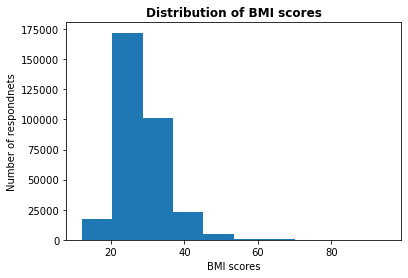

In [93]:
plt.hist(data = heart_disease_df, x = 'BMI')
plt.title('Distribution of BMI scores', weight = "bold")
plt.xlabel('BMI scores')
plt.ylabel('Number of respondnets');

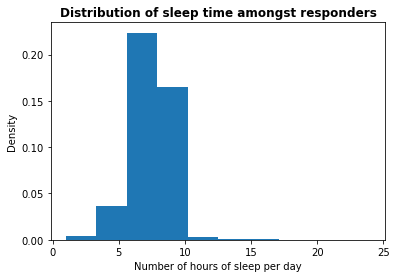

In [94]:
plt.hist(data = heart_disease_df, x = 'SleepTime', density = True)
plt.title('Distribution of sleep time amongst responders', weight = "bold")
plt.xlabel('Number of hours of sleep per day')
plt.ylabel('Density');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
We have two different data classes within our dataset, numerical and categorical. Visualising the columns with numerical data showed unimodal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
Looking at the histograms depicting the distribution of the scores for Mental health and Physical health, 
show a right skew. No transformation was required to modify the appearance of the distribution. 
This was because going back to analysing the nature of the question asked, it was expected that the answers will lead 
to such a presentation. In addition to this, I also looked at the BMI column but decided to create another column which transforms the scores into the different weight classes based on the BMI as this is will provide us with better insights, and also the impact will be understood by any lay person as compared to just raw figures.

## Bivariate Exploration

I will start off by looking at pairwise correlation between the numerical variables

In [26]:
#I will divide the columns of the dataframe into two subclasses, based on the data type.

numeric_variables = ['PhysicalHealth', 'MentalHealth', 'SleepTime', 'BMI']
categoric_variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'SkinCancer', 'Sex', 'KidneyDisease', 'AgeCategory', 'Race', 'Diabetic', 'Asthma', 'PhysicalActivity', 'BMI_Category']

### Correlation between numerical variables

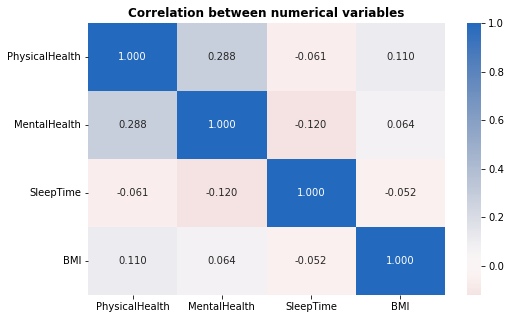

In [95]:
plt.figure(figsize = [8, 5])
sb.heatmap(heart_disease_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numerical variables', weight = "bold")
plt.show()

heart_disease_df.shape= (319795, 19)
heart_disease_samp.shape= (2000, 19)


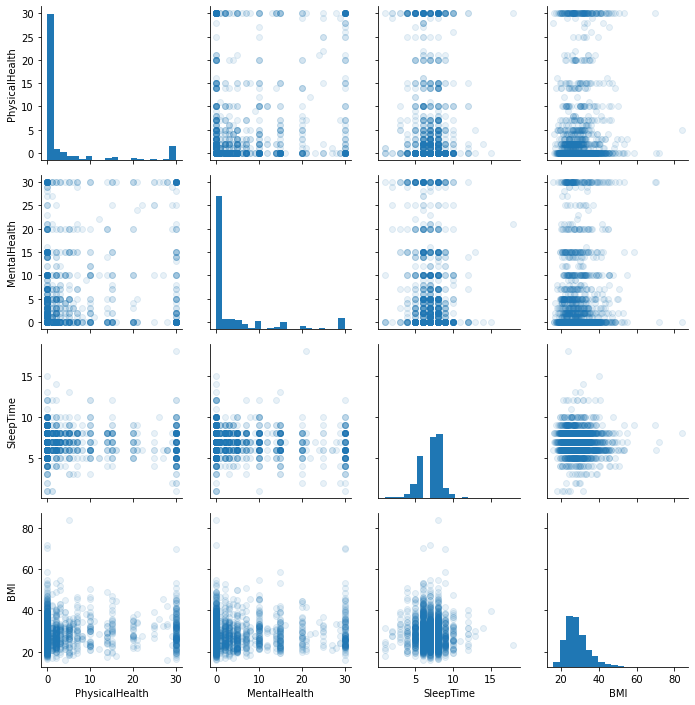

In [44]:
# plot matrix: sample 2000 responses so that plots are clearer and they render faster
print("heart_disease_df.shape=",heart_disease_df.shape)
heart_disease_samp = heart_disease_df.sample(n=2000, replace = False)
print("heart_disease_samp.shape=",heart_disease_samp.shape)

g = sb.PairGrid(data = heart_disease_samp, vars = numeric_variables)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha= 0.1)

The correalation plot shows at best only a week positive correlation between physical and mental health status of the subjects. None of the other variables are correlated. Further analysis using a grid plot also reveals the same information. This is quite surprising as research has conclusively determind for example, that a lack of sleep is associated with worsening physical and mental health, as well as obesity, that trend is not so obvious in our dataset. 

### What is the relationship between BMI and heart disease between the two genders?

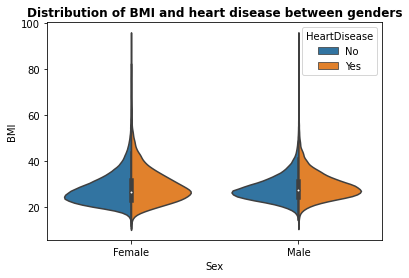

In [96]:
sb.violinplot(x ="Sex", y ="BMI", hue ="HeartDisease",
data = heart_disease_df, split = True)
plt.title('Distribution of BMI and heart disease between genders', weight = "bold");

<AxesSubplot:xlabel='Sex', ylabel='BMI'>

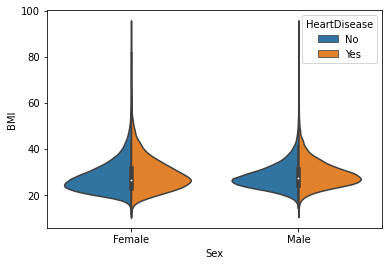

In [30]:
sb.violinplot(x ="Sex", y ="BMI", hue ="HeartDisease",
data = heart_disease_df, split = True)


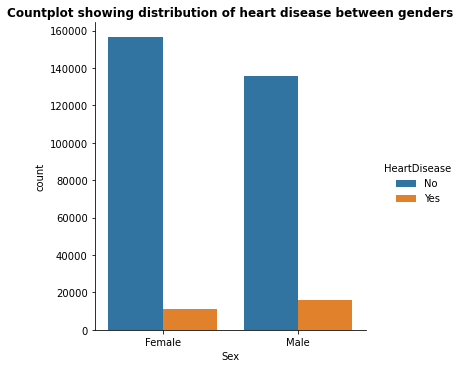

In [97]:
sb.catplot(x ="Sex", hue ="HeartDisease",
kind ="count", data = heart_disease_df)
plt.title('Countplot showing distribution of heart disease between genders', weight = "bold");

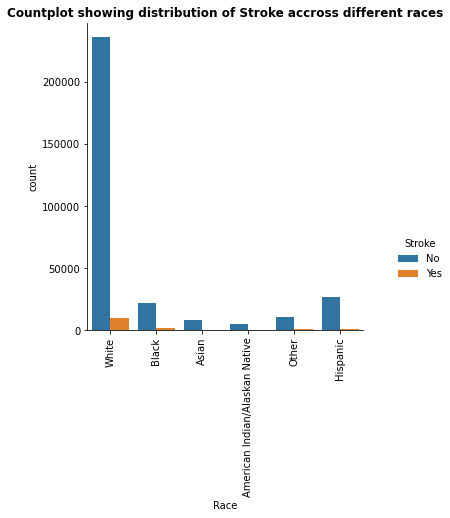

In [106]:
#An important risk factor for stroke is heart disease, lets look through our data and find out the distribution of stroke between races
sb.catplot(x ="Race", hue ="Stroke",
kind ="count", data = heart_disease_df)
plt.title('Countplot showing distribution of Stroke accross different races', weight = "bold")
plt.xticks(rotation = 'vertical');

our plot shows that the prevalence of stroke is low within the population in question, although between groups, it was found to be highest amongst Caucasians. Could this be because they constitute about 75% of the study population? or could this be because of other factors?

In [32]:
#Let's go a little further by investigating the distribution and relationship between Heart disease and the different BMI categories.
#We will do so using a heatmap and a clustered bar chat. In order to create our heatmap, we will have to create a dataframe.

BMI_heart = heart_disease_df.groupby(['BMI_Category', 'HeartDisease']).size()
BMI_heart = BMI_heart.reset_index(name = 'count')
BMI_heart.pivot(index = 'BMI_Category', columns = 'HeartDisease', values = 'count')

HeartDisease,No,Yes
BMI_Category,,
Healthy Weight,91022,6309
Obese class I,55185,6160
Obese class II,22412,2700
Obese class III,14573,1812
Overweight,104521,9991
Under Weight,4709,401


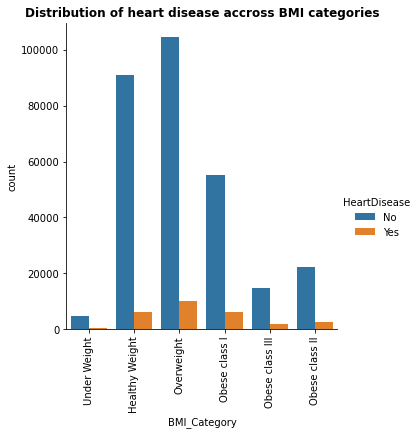

In [98]:
sb.catplot(x ="BMI_Category", hue ="HeartDisease",
kind ="count", data = heart_disease_df)
plt.title('Distribution of heart disease accross BMI categories', weight = "bold")
plt.xticks(rotation = 'vertical');


Looking at the plots above, its obvious that a majority of the respondents are female, an overwhelming majority of respondents do not have heart disease, nonetheless the disease is more prevalent among males as compared to females. The violin plot also reveals that the BMI of most patients who have heart disease is within the overwieght BMI class.

### Which age categories are more affected by heart disease and which are not?

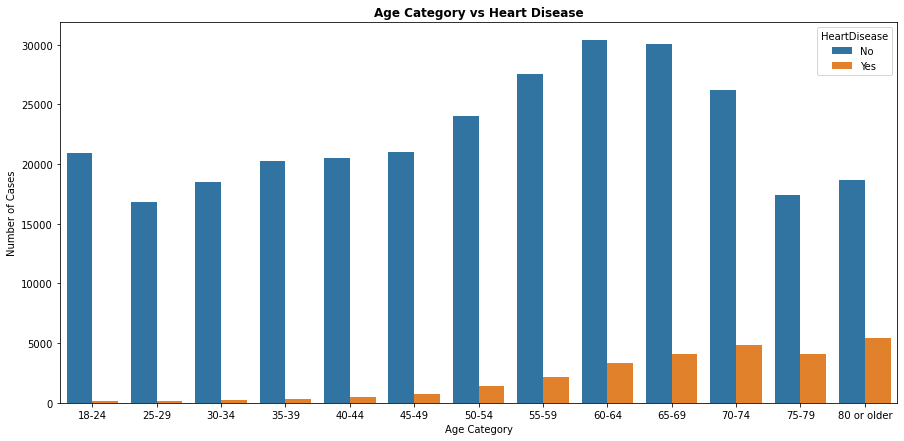

In [99]:

plt.figure(figsize=(15,7))
sb.countplot(data=heart_disease_df , x='AgeCategory', hue='HeartDisease', order=['18-24', '25-29', '30-34', '35-39', '40-44',
                                                                      '45-49', '50-54', '55-59', '60-64', '65-69',
                                                                      '70-74', '75-79', '80 or older'])
plt.title('Age Category vs Heart Disease', weight = "bold")
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.show()

It is obvious from the plot above that most of the respondents are above the age of 50, while the highest prevalence of heart disease was found amongst the 80 or older age group.

### Which race/ethnicity has the highest prevalence of heart disease?

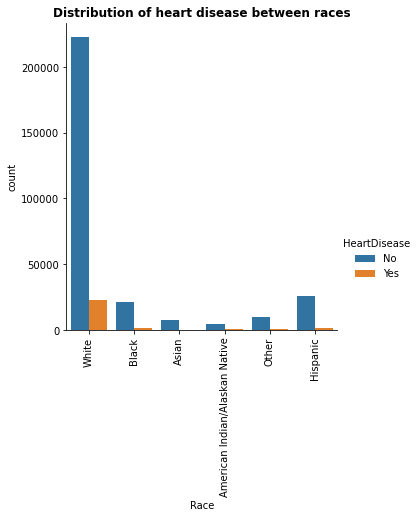

In [100]:
sb.catplot(x ="Race", hue ="HeartDisease",
kind ="count", data = heart_disease_df)
plt.title('Distribution of heart disease between races', weight = "bold")
plt.xticks(rotation = 'vertical');

Our countplot reveals that the highest prevalence is seen among Caucasians, could this be because most repondents are Caucasians or is the reason deeper than that?

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The variable of interest had no correlation with any of the other variables in the dataframe. This is surprising, as one of the key determinants of its existence is Smoking, but there was no correlation between Heart disease and smoking in our analysis.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Only a weak positive correlation exists between Physical and Mental health

## Multivariate Exploration

#### What does the distribution of the different risk factors with relation to the BMI categories?

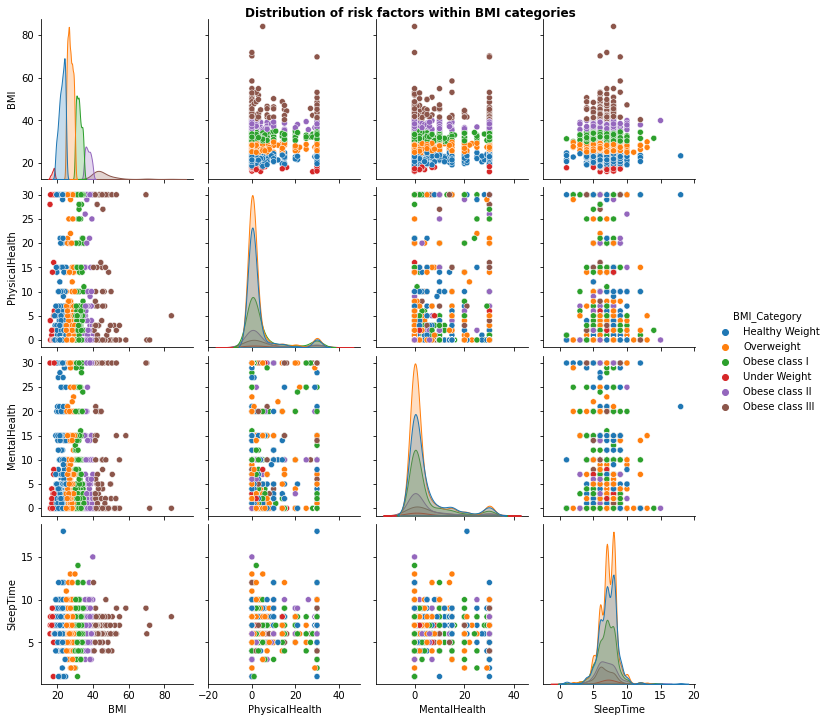

In [107]:
p.fig.set_size_inches(10, 8)
p =sb.pairplot(heart_disease_samp, hue="BMI_Category")
p.fig.suptitle('Distribution of risk factors within BMI categories', y=1, weight = "bold" );

The pairplot above present results that are similar to what was obtained in other plot subtypes earlier, the patterns of distribution arent clear, with no patterns of correlation.

#### How does the relationship between BMI and Physical health appear?

Text(0, 0.5, 'PhysicalHealth')

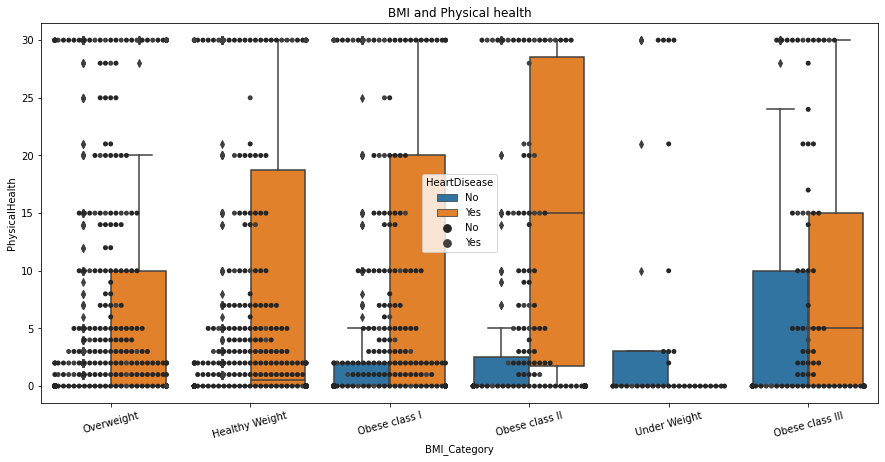

In [39]:
plt.figure(figsize=(15,7))
sb.boxplot(data=heart_disease_samp, x='BMI_Category', y='PhysicalHealth', hue='HeartDisease')
sb.swarmplot(x='BMI_Category', y='PhysicalHealth', data=heart_disease_samp, hue='HeartDisease', color=".25")
plt.title('BMI and Physical health')
plt.xticks(rotation=15)
plt.xlabel('BMI Category')
plt.ylabel('Physical Health');

Our plot shows that the overweight class has the highest number of heart disease cases, whole the lowest physical health scores were found in the Obese class.

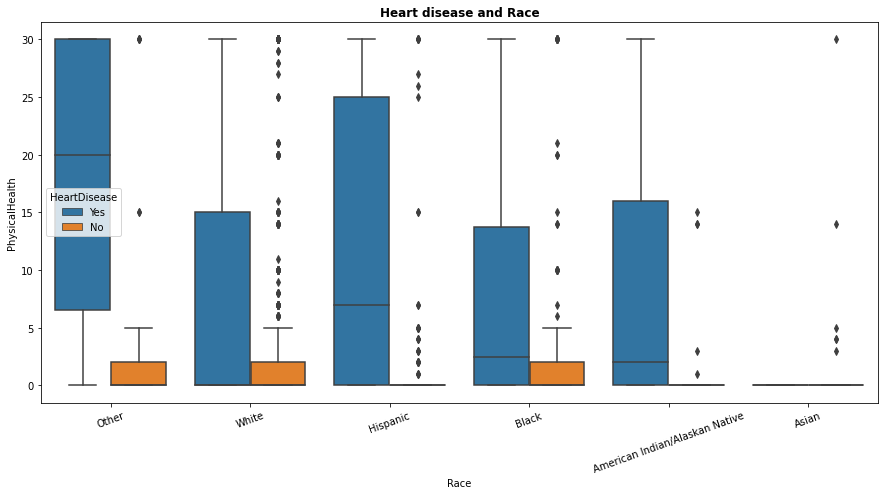

In [102]:
plt.figure(figsize=(15,7))
sb.boxplot(data=heart_disease_samp, x='Race', y='PhysicalHealth', hue='HeartDisease')
plt.title('Heart disease and Race', weight = "bold")
plt.xticks(rotation=20);

Our plot shows that physical health scores are comparable between Caucasians and Hispanics, although there are many more heart disease cases amongst Caucasians. Outliers within the groups appear to be on the high side. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The findings from the multivariate plot echo the findings from the earlier plot types, features that are historically found to correlate failed to show this relationship in our dataset.

### Were there any interesting or surprising interactions between features?

The surprise is a lack of interraction between features rather than an interraction

## Conclusions
In conclusion, I believe additional data from other key determinants of heart disease- high cholesterol and hypertension are required to make a thorough analysis in other to establish a correlation.
